In [1]:
import os
os.chdir('..')

# Model Evaluation
This notebook can be used to evaluate the performance of any of the sentiment analysis models. Currently, as an example, this notebook evaluates the machine learning model, but this can effortlessly be changes to any of the other models.

In [2]:
import articles as art
from evaluation import Evaluator

import numpy as np
import pickle

#Before a model can be evaluated, it needs to be imported
import models.machine_learning
#import models.lexicon_based
#import models.lexicon_based_negation_scope


## Step 1. Load articles and other objects needed by the model
All models require a set of articles to analyse. Furthermore, depending on the model, additional objects need to be loaded. For instance, the machine learning model requires a trained SVM classifier and an article vectorizer, which are here both imported from pickles.

In [10]:
articles = art.load_articles()

In [11]:
classifier_file = 'pickles/svm_classifier'
classifier = pickle.load( open( classifier_file, "rb" ) )
vectorizer_file = 'pickles/vectorizer'
vectorizer = pickle.load( open( vectorizer_file, "rb" ) )

## Step 2. Choose a (real estate) index to analyze
The model needs to be provided with a real estate economic index to analyze. Our data folder contains two indices, one for the direct real estate market and one for the securitized market. Additional indices can easily be added and implemented.

In [12]:
direct_housing_market_index = 'data/real_estate_data/direct/england.csv'
securitized_housing_market_index = 'data/real_estate_data/securitized/FTSE EPRA_NAREIT UK Historical Data.csv'

## Step 3. Initialize and run the model
First, we initialize our model using its class with the necessary parameters. Then, we use an evaluator object to provide us with the results of our model's analysis. The evaluator provides us with the estimated VAR coefficients, forecast plots, and other performance metrics, such as the MAPE, accuracy, and confusion matrix.

§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
POSITIVE SENTIMENT


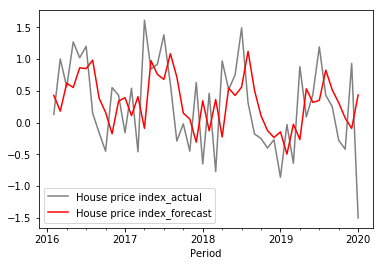

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 25, May, 2020
Time:                     09:52:41
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -6.52073
Nobs:                     188.000    HQIC:                  -6.70506
Log likelihood:           126.556    FPE:                 0.00108036
AIC:                     -6.83060    Det(Omega_mle):     0.000983904
--------------------------------------------------------------------
Results for equation House price index
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.097098         0.048250            2.012           0.044
L1.House price index         0.558887         0.074925            7.459           0.000
L1.Positive Scores  

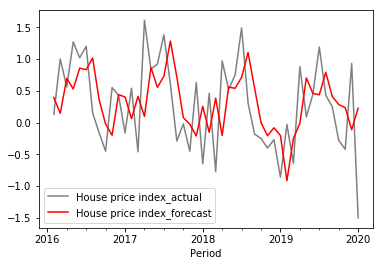

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 25, May, 2020
Time:                     09:52:41
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -6.61091
Nobs:                     188.000    HQIC:                  -6.79523
Log likelihood:           135.033    FPE:                0.000987202
AIC:                     -6.92078    Det(Omega_mle):     0.000899061
--------------------------------------------------------------------
Results for equation House price index
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.087866         0.047112            1.865           0.062
L1.House price index         0.542262         0.074655            7.264           0.000
L1.Negative Scores  

In [13]:
model = models.machine_learning.Model(articles, classifier, vectorizer)
ev = Evaluator(model, articles, direct_housing_market_index)

## Generating a LaTex table (optional)
If desired, a LaTex table summarizing the estimated VAR coefficients can be printed. The printer outputs only table rows, so headers need to be added and styled manually.

In [17]:
ev.print_latex_table(sentiment="positive", housing_label="Housing Index", sentiment_label="Postivity")

Constant & \num{9.710e-02} & \num{4.825e-02} & $2.012$ & $0.044$ \tnote{*} & \num{1.913e-03} & \num{1.923e-01} \\
Housing Index \textit{(-1)} & \num{5.589e-01} & \num{7.492e-02} & $7.459$ & $0.0$ \tnote{*} & \num{4.111e-01} & \num{7.067e-01} \\
Housing Index \textit{(-2)} & \num{1.194e-01} & \num{8.480e-02} & $1.408$ & $0.159$  & \num{-4.790e-02} & \num{2.867e-01} \\
Housing Index \textit{(-3)} & \num{5.177e-02} & \num{8.494e-02} & $0.61$ & $0.542$  & \num{-1.158e-01} & \num{2.193e-01} \\
Housing Index \textit{(-4)} & \num{4.701e-03} & \num{7.433e-02} & $0.063$ & $0.95$  & \num{-1.419e-01} & \num{1.513e-01} \\
Postivity \textit{(-1)} & \num{9.470e-02} & \num{7.512e-01} & $0.126$ & $0.9$  & \num{-1.387e+00} & \num{1.577e+00} \\
Postivity \textit{(-2)} & \num{5.930e-01} & \num{9.309e-01} & $0.637$ & $0.524$  & \num{-1.243e+00} & \num{2.429e+00} \\
Postivity \textit{(-3)} & \num{1.178e+00} & \num{9.319e-01} & $1.264$ & $0.206$  & \num{-6.609e-01} & \num{3.016e+00} \\
Postivity \textit{(-4